In [49]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

sangam = pd.read_csv("월드컵경기장.csv", encoding="cp949")

In [50]:
sangam
# 2015 ~ 2022 데이터

,연번,경기(행사) 일시,구 분,경기(행사) 종류,경기(행사) 내용,주 최,관람인원(명),수입금(원),사용일수(일)
0,1.0,2015-02-17 19:30,기타축구,ACL,ACL(vs하노이T&T FC),GS스포츠,6718.0,23835150.0,3.0
1,2.0,2015-03-04 19:30,기타축구,ACL,ACL(vs가시마앤틀러스),GS스포츠,5790.0,27579990.0,2.0
2,3.0,2015-03-14 14:00,K리그,K리그 클래식,K리그 클래식(vs전북),GS스포츠,32516.0,53033020.0,1.0
3,4.0,2015-03-18 19:30,기타축구,ACL,ACL(vs웨스턴시드니),GS스포츠,5645.0,26955470.0,2.0
4,5.0,2015-03-31 20:00,국가대표,국가대표팀 친선경기,친선경기(vs뉴질랜드),대한축구협회,28574.0,152907970.0,3.0
...,...,...,...,...,...,...,...,...,...
279,280.0,2022-11-26 15:00,기타축구,제12회 한일 국회의원 축구대회,제12회 한일 국회의원 축구대회,국회사무처(국제국 아태과),120.0,3435160.0,1.0
280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
sangam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   연번         280 non-null    float64
 1   경기(행사) 일시  280 non-null    object 
 2   구 분        280 non-null    object 
 3   경기(행사) 종류  280 non-null    object 
 4   경기(행사) 내용  280 non-null    object 
 5   주 최        280 non-null    object 
 6    관람인원(명)   279 non-null    float64
 7   수입금(원)     279 non-null    float64
 8   사용일수(일)    280 non-null    float64
dtypes: float64(4), object(5)
memory usage: 20.1+ KB


In [52]:
sangam.columns

Index(['연번', '경기(행사) 일시', '구 분', '경기(행사) 종류', '경기(행사) 내용', '주 최', ' 관람인원(명) ',
       '수입금(원)', '사용일수(일)'],
      dtype='object')

In [53]:
sangam.columns = sangam.columns.str.replace(' ', '')
sangam.columns

# 열 이름에서 띄어쓰기 제거

Index(['연번', '경기(행사)일시', '구분', '경기(행사)종류', '경기(행사)내용', '주최', '관람인원(명)',
       '수입금(원)', '사용일수(일)'],
      dtype='object')

In [54]:
sangam["관람인원(명)"]

0       6718.0
1       5790.0
2      32516.0
3       5645.0
4      28574.0
        ...   
279      120.0
280        NaN
281        NaN
282        NaN
283        NaN
Name: 관람인원(명), Length: 284, dtype: float64

In [55]:
sangam = sangam.drop('연번', axis=1)
sangam = sangam.drop('구분', axis=1)
sangam = sangam.drop('경기(행사)종류', axis=1)
sangam = sangam.drop('주최', axis=1)
sangam = sangam.drop('수입금(원)', axis=1)
sangam = sangam.drop('사용일수(일)', axis=1)

# 불필요한 열 제거

In [56]:
sangam = sangam.drop(sangam.tail(4).index)
# 결측치 제거

sangam = sangam[~sangam['경기(행사)일시'].str.startswith(('2020', '2021'))]
# 코로나 상황으로 2020년, 2021년 데이터 제거

sangam.dropna(subset=['관람인원(명)'], inplace=True)
# '인원'열의 결측치 데이터 제거 -> 1개의 행 제거

In [57]:
sangam

,경기(행사)일시,경기(행사)내용,관람인원(명)
0,2015-02-17 19:30,ACL(vs하노이T&T FC),6718.0
1,2015-03-04 19:30,ACL(vs가시마앤틀러스),5790.0
2,2015-03-14 14:00,K리그 클래식(vs전북),32516.0
3,2015-03-18 19:30,ACL(vs웨스턴시드니),5645.0
4,2015-03-31 20:00,친선경기(vs뉴질랜드),28574.0
...,...,...,...
275,2022-10-01 14:00,2022 K리그1 파이널 서울 vs 대구,8111.0
276,2022-10-12 19:30,2022 K리그1 파이널 서울 vs 김천,4572.0
277,2022-10-16 19:00,2022 K리그1 파이널 서울 vs 성남,7746.0
278,2022-10-17 19:00,2022 하나은행 FA컵 결승전(1차전) FC서울 VS 전북,14705.0


In [58]:
sangam.dtypes

sangam = sangam.rename(columns={'경기(행사)일시': '행사일시'})
sangam = sangam.rename(columns={'경기(행사)내용': '행사내용'})
sangam = sangam.rename(columns={'관람인원(명)': '인원'})

# 열 이름 변경

In [59]:
top_20 = sangam.nlargest(20, '인원')
print(top_20)

# 인원 수 상위 20개 행사

                 행사일시                               행사내용       인원
163  2018-05-18 10:00          2018 세계평화와 희망나눔을 위한 기도대성회  65608.0
86   2016-08-20 19:00                     빅뱅 10주년 기념 콘서트  64816.0
183  2019-03-26 20:00            축구국가대표팀 친선경기 대한민국vs콜롬비아  64412.0
176  2018-10-12 20:00            축구국가대표팀 친선경기 대한민국vs우루과이  64170.0
37   2015-10-16 10:00                         2015 기도대성회  63336.0
267  2022-07-13 20:00  2022 쿠팡플레이시리즈 친선경기 (팀K리그 vs.토트넘)   63234.0
196  2019-07-26 20:00                    K리그 올스타vs유벤투스FC  62689.0
262  2022-06-02 20:00      하나은행 초청 국가대표 친선경기 대한민국 vs 브라질  61633.0
254  2022-03-24 20:00          2022 카타르월드컵 최종예선 대한민국vs이란  61226.0
146  2017-08-31 21:00                        월드컵예선(vs이란)  60326.0
152  2017-11-11 10:00                      한반도 평화통일 세계대회  55991.0
25   2015-08-15 19:00                          815 국민대합창  55841.0
274  2022-09-27 20:00      하나은행 초청 국가대표 친선경기 대한민국 vs 카메룬  54910.0
263  2022-06-14 20:00      하나은행 초청 국가대표 친선경기 대한민국 vs 이집트  53769.0
96   2016-

In [60]:
bottom_20 = sangam.nsmallest(20, '인원')
print(bottom_20)

# 인원 수 하위 20개 행사

                 행사일시             행사내용    인원
46   2015-06-06 15:00        시민개방 축구경기  40.0
43   2015-04-11 10:00        시민개방 축구경기  50.0
47   2015-07-19 11:00        시민개방 축구경기  50.0
48   2015-09-06 08:00        시민개방 축구경기  50.0
51   2016-02-29 14:00   ACL 적응훈련(히로시마)  50.0
56   2016-04-04 19:30   ACL 적응훈련(산둥루넝)  50.0
59   2016-04-19 18:00    ACL 적응훈련(부리람)  50.0
61   2016-04-22 15:00        일반시민 축구경기  50.0
66   2016-05-24 18:00    ACL 적응훈련(우라와)  50.0
74   2016-06-25 08:00        일반시민 축구경기  50.0
75   2016-06-26 08:00        일반시민 축구경기  50.0
80   2016-07-16 08:00        일반시민 축구경기  50.0
81   2016-07-17 08:00        일반시민 축구경기  50.0
87   2016-08-23 18:30   ACL 적응훈련(산둥루넝)  50.0
90   2016-08-31 19:00   월드컵예선 적응훈련(중국)  50.0
94   2016-09-11 08:00        일반시민 축구경기  50.0
97   2016-09-24 09:30        일반시민 축구경기  50.0
101  2016-10-15 12:00  2016 서울컵 남자부 결승  50.0
103  2016-10-18 18:30     ACL 적응훈련(전북)  50.0
105  2016-10-22 12:00  2016 서울컵 여자부 결승  50.0


In [61]:
sangam.describe()

,인원
count,241.000000
mean,15132.004149
std,16253.619290
min,40.000000
25%,2354.000000
50%,10816.000000
75%,18441.000000
max,65608.000000


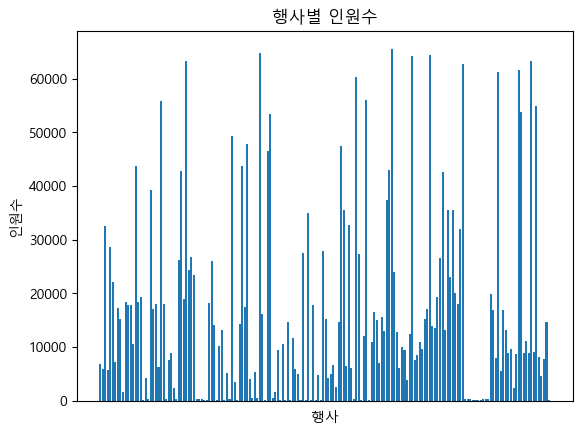

In [62]:
plt.bar(sangam['행사내용'], sangam['인원'])
plt.xlabel('행사')
plt.ylabel('인원수')
plt.title('행사별 인원수')
plt.xticks(rotation=90)
plt.xticks([])  # x축 눈금 비우기.
plt.show()

# 행사별 인원수 막대 그래프

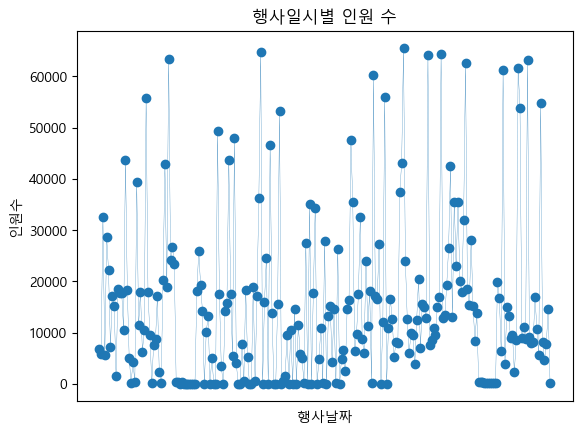

In [63]:
plt.plot(sangam['행사일시'], sangam['인원'], marker='o', linestyle='-', linewidth=0.2)
plt.xlabel('행사날짜')
plt.ylabel('인원수')
plt.title('행사일시별 인원 수')
plt.xticks([])  # x축 눈금을 비우기
plt.xticks(rotation=90)
plt.show()

# 행사일시별 인원 수 꺾은선 그래프

In [64]:
big_event = sangam[sangam['인원'] >= 50000]
big_event

# 인원수 5만명 이상의 대형 행사

,행사일시,행사내용,인원
25,2015-08-15 19:00,815 국민대합창,55841.0
37,2015-10-16 10:00,2015 기도대성회,63336.0
86,2016-08-20 19:00,빅뱅 10주년 기념 콘서트,64816.0
96,2016-09-23 10:00,전국금융노조 축제 한마당,53332.0
146,2017-08-31 21:00,월드컵예선(vs이란),60326.0
152,2017-11-11 10:00,한반도 평화통일 세계대회,55991.0
163,2018-05-18 10:00,2018 세계평화와 희망나눔을 위한 기도대성회,65608.0
176,2018-10-12 20:00,축구국가대표팀 친선경기 대한민국vs우루과이,64170.0
183,2019-03-26 20:00,축구국가대표팀 친선경기 대한민국vs콜롬비아,64412.0
196,2019-07-26 20:00,K리그 올스타vs유벤투스FC,62689.0


In [65]:
percentage = (sangam['인원'] / sangam['인원'].mean()) * 100
print(percentage)

# 혼잡도(%) = (관람인원수 / 평균인원수)이라고 하고, 혼잡도 값이 높을수록 대규모 행사의 성격을 띈다.

0       44.395970
1       38.263273
2      214.882310
3       37.305039
4      188.831563
          ...    
275     53.601624
276     30.214107
277     51.189518
278     97.178139
279      0.793021
Name: 인원, Length: 241, dtype: float64


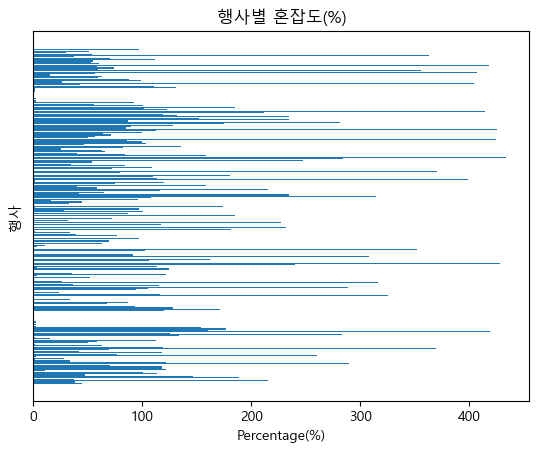

In [66]:
plt.barh(range(len(percentage)), percentage)
plt.xlabel('Percentage(%)')
plt.ylabel('행사')
plt.title('행사별 혼잡도(%)')
plt.yticks(range(len(percentage)), sangam['행사내용'])
plt.yticks([])
plt.show()

In [67]:
filtered_data = sangam[percentage >= 350]
filtered_data

# 혼잡도의 값이 350% 이상인 데이터를 대규모 행사라고 가정.
# 혼잡도 350% 이상인 데이터와 관람인원 50000명 이상인 데이터가 15개로 일치
# 관람인원 데이터가 관람일이 하루가 아닌 여러 날이 합쳐진 데이터의 경우 제외해야함
# '815 국민대합창', '2015 기도대성회', '전국금융노조 축제 한마당', '한반도 평화통일 세계대회', '2018 세계평화와 희망나눔을 위한 기도대성회' 의 5개 행사 제외

,행사일시,행사내용,인원
25,2015-08-15 19:00,815 국민대합창,55841.0
37,2015-10-16 10:00,2015 기도대성회,63336.0
86,2016-08-20 19:00,빅뱅 10주년 기념 콘서트,64816.0
96,2016-09-23 10:00,전국금융노조 축제 한마당,53332.0
146,2017-08-31 21:00,월드컵예선(vs이란),60326.0
152,2017-11-11 10:00,한반도 평화통일 세계대회,55991.0
163,2018-05-18 10:00,2018 세계평화와 희망나눔을 위한 기도대성회,65608.0
176,2018-10-12 20:00,축구국가대표팀 친선경기 대한민국vs우루과이,64170.0
183,2019-03-26 20:00,축구국가대표팀 친선경기 대한민국vs콜롬비아,64412.0
196,2019-07-26 20:00,K리그 올스타vs유벤투스FC,62689.0


In [46]:
events_to_exclude = ['815 국민대합창', '2015 기도대성회', '전국금융노조 축제 한마당', '한반도 평화통일 세계대회', '2018 세계평화와 희망나눔을 위한 기도대성회']
filtered_data = top_15_data[~top_15_data['행사내용'].isin(events_to_exclude)].head(10)
filtered_data

,행사일시,행사내용,인원
86,2016-08-20 19:00,빅뱅 10주년 기념 콘서트,64816.0
146,2017-08-31 21:00,월드컵예선(vs이란),60326.0
176,2018-10-12 20:00,축구국가대표팀 친선경기 대한민국vs우루과이,64170.0
183,2019-03-26 20:00,축구국가대표팀 친선경기 대한민국vs콜롬비아,64412.0
196,2019-07-26 20:00,K리그 올스타vs유벤투스FC,62689.0
254,2022-03-24 20:00,2022 카타르월드컵 최종예선 대한민국vs이란,61226.0
262,2022-06-02 20:00,하나은행 초청 국가대표 친선경기 대한민국 vs 브라질,61633.0
263,2022-06-14 20:00,하나은행 초청 국가대표 친선경기 대한민국 vs 이집트,53769.0
267,2022-07-13 20:00,2022 쿠팡플레이시리즈 친선경기 (팀K리그 vs.토트넘),63234.0
274,2022-09-27 20:00,하나은행 초청 국가대표 친선경기 대한민국 vs 카메룬,54910.0


In [47]:
sangam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 279
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행사일시    241 non-null    object 
 1   행사내용    241 non-null    object 
 2   인원      241 non-null    float64
dtypes: float64(1), object(2)
memory usage: 15.6+ KB


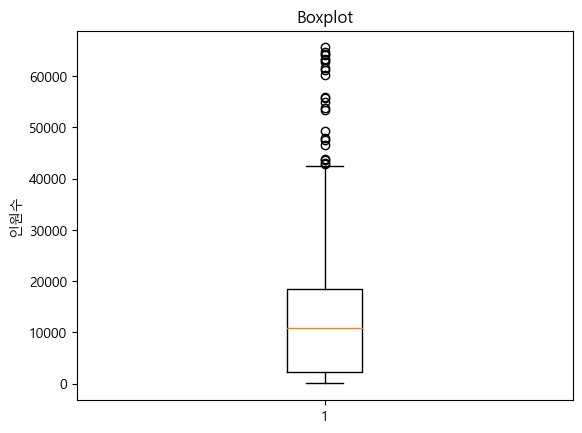

In [48]:
#boxplot 

plt.boxplot(sangam['인원'])
plt.title('Boxplot')
plt.ylabel('인원수')
plt.show()